### Imports

In [2]:
# imports

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [103]:
# import, preprocess, and look over raw data

df = pd.read_csv("data/data_01_05_2025.csv")
df = df.dropna(subset=['DatasetID'])
df.replace("n/a", "", inplace=True)
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df.rename(columns={'iEEG modality': 'iEEG Modality'}, inplace=True)
# df.set_index('DatasetID', inplace=True)

print(f'df shape: {df.shape}')
df.tail()

df shape: (303, 71)


/var/folders/ds/qxmx4zy969v_twj4bz2m_zvw0000gn/T/ipykernel_9738/1056757959.py:6: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

/var/folders/ds/qxmx4zy969v_twj4bz2m_zvw0000gn/T/ipykernel_9738/1056757959.py:7: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



,intern,DatasetID,Warning Message,Error Message,has_visualization,No papers linked - hard to find other data,"Multiple Papers linked, none match NEMAR",HED anotation,Participants,Age range,...,Published date,Uploaded by,Date last update,Dataset DOI,References and links,License,On Brainlife.org,Funding,Ethics Approvals,IRB
301,liz,ds003483,NaN,NaN,False,NaN,NaN,no,21,NaN,...,1/24/21 10:37,luis fernando antón toro,NaN,10.18112/openneuro.ds003483.v1.0.2,NaN,cc0,true,NaN,NaN,NaN
302,liz,ds003352,please use the checkmaxfilter option before pr...,NaN,False,NaN,NaN,no,18,17-26,...,11/3/20 21:07,conway lab,NaN,10.18112/openneuro.ds003352.v1.0.0,"appelhoff, s., sanderson, m., brooks, t., vlie...",cc0,true,NaN,NaN,NaN
303,liz,ds002791,the dataset indicates it contains data epochs ...,NaN,False,NaN,NaN,no,23,19-40,...,7/17/20 20:53,ahmad mheich,NaN,10.18112/openneuro.ds002791.v1.0.0,NaN,cc0,true,NaN,NaN,NaN
304,peter,ds005107,NaN,NaN,NaN,NaN,NaN,no,21,20-27,...,6/26/24 6:05,wei xu,NaN,doi:10.18112/openneuro.ds005107.v1.0.3,NaN,cc0,false,NaN,NaN,NaN
305,peter,ds005274,NaN,NaN,NaN,NaN,NaN,no,22,20-26,...,7/7/24 9:38,yukako ito,NaN,doi:10.18112/openneuro.ds005274.v1.0.0,NaN,cc0,false,NaN,NaN,NaN


### Figure 1

Modality x Modality of experiment x type of experiment 

Network chart start w main modality (EEG, MEG, IEGG) and then continue to break up (like figure 4 in other paper)

In [172]:
LABEL_MAINMODALITY = 'Main Modality:'
LABEL_MODALITYOFEXP = 'Modality of Experiment:'
LABEL_TYPEOFEXP = 'Type of Experiment:'

df_fig1 = df[['EEG Modality', 'MEG Modality', 'iEEG Modality', 'FOR FIGURE - modality of exp', 'FOR FIGURE - type of exp']]

mainModality_types = ['EEG', 'MEG', 'iEEG']
modalityOfExp_types = df['FOR FIGURE - modality of exp'].unique()
typeOfExp_types = df['FOR FIGURE - type of exp'].unique()

# Create lists for the nodes and links
nodes = []
node_indices = {}
links = []
index = 0

# Add primary modalities to nodes
for mainModality in mainModality_types:
    mainModality = f"{LABEL_MAINMODALITY} {mainModality}"
    nodes.append(mainModality)
    node_indices[mainModality] = index
    index += 1

# Add additional modalities to nodes
for modalityOfExp in modalityOfExp_types:
    modalityOfExp = f"{LABEL_MODALITYOFEXP} {modalityOfExp}"
    nodes.append(modalityOfExp)
    node_indices[modalityOfExp] = index
    index += 1

# Add types of experiments to nodes
for typeOfExp in typeOfExp_types:
    typeOfExp = f"{LABEL_TYPEOFEXP} {typeOfExp}"
    nodes.append(typeOfExp)
    node_indices[typeOfExp] = index
    index += 1

# Create links between primary modalities and additional modalities
for mainModality in mainModality_types:
    mainModalityKey = f"{LABEL_MAINMODALITY} {mainModality}"
    for modalityOfExp in modalityOfExp_types:
        if pd.notna(modalityOfExp):
            modalityOfExpKey = f"{LABEL_MODALITYOFEXP} {modalityOfExp}"
            count = df_fig1[(df_fig1[f'{mainModality} Modality'] == 'x') & 
                            (df_fig1['FOR FIGURE - modality of exp'] == modalityOfExp)].shape[0]
            if count > 0:
                links.append({
                    'source': node_indices[mainModalityKey],
                    'target': node_indices[modalityOfExpKey],
                    'value': count
                })

# Create links between additional modalities and types of experiments
for modalityOfExp in modalityOfExp_types:
    if pd.notna(modalityOfExp):
        modalityOfExpKey = f"{LABEL_MODALITYOFEXP} {modalityOfExp}"
        for typeOfExp in typeOfExp_types:
            if pd.notna(typeOfExp):
                typeOfExpKey = f"{LABEL_TYPEOFEXP} {typeOfExp}"
                count = df_fig1[(df_fig1['FOR FIGURE - modality of exp'] == modalityOfExp) & 
                                (df_fig1['FOR FIGURE - type of exp'] == typeOfExp)].shape[0]
                if count > 0:
                    links.append({
                        'source': node_indices[modalityOfExpKey],
                        'target': node_indices[typeOfExpKey],
                        'value': count
                    })

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=20,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nodes
    ),
    link=dict(
        source=[link['source'] for link in links],
        target=[link['target'] for link in links],
        value=[link['value'] for link in links]
    )
)])

fig.update_layout(
    title_text="Sankey Diagram of Primary Modalities, Additional Modalities, and Types of Experiments",
    font=dict(size=12),
    width=1200  # Set the width to a smaller value to compress the figure horizontally
)

fig.show()

# fourth column with 

### Figure 2

Figure 2 - Modality x Additional Modality
A network diagram or Sankey diagram displaying the connections between primary modality (e.g., EEG) and additional modalities (e.g., fMRI, behavioral). This can visually represent multi-modality studies and show how often additional methods were used


/var/folders/ds/qxmx4zy969v_twj4bz2m_zvw0000gn/T/ipykernel_9738/863119495.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



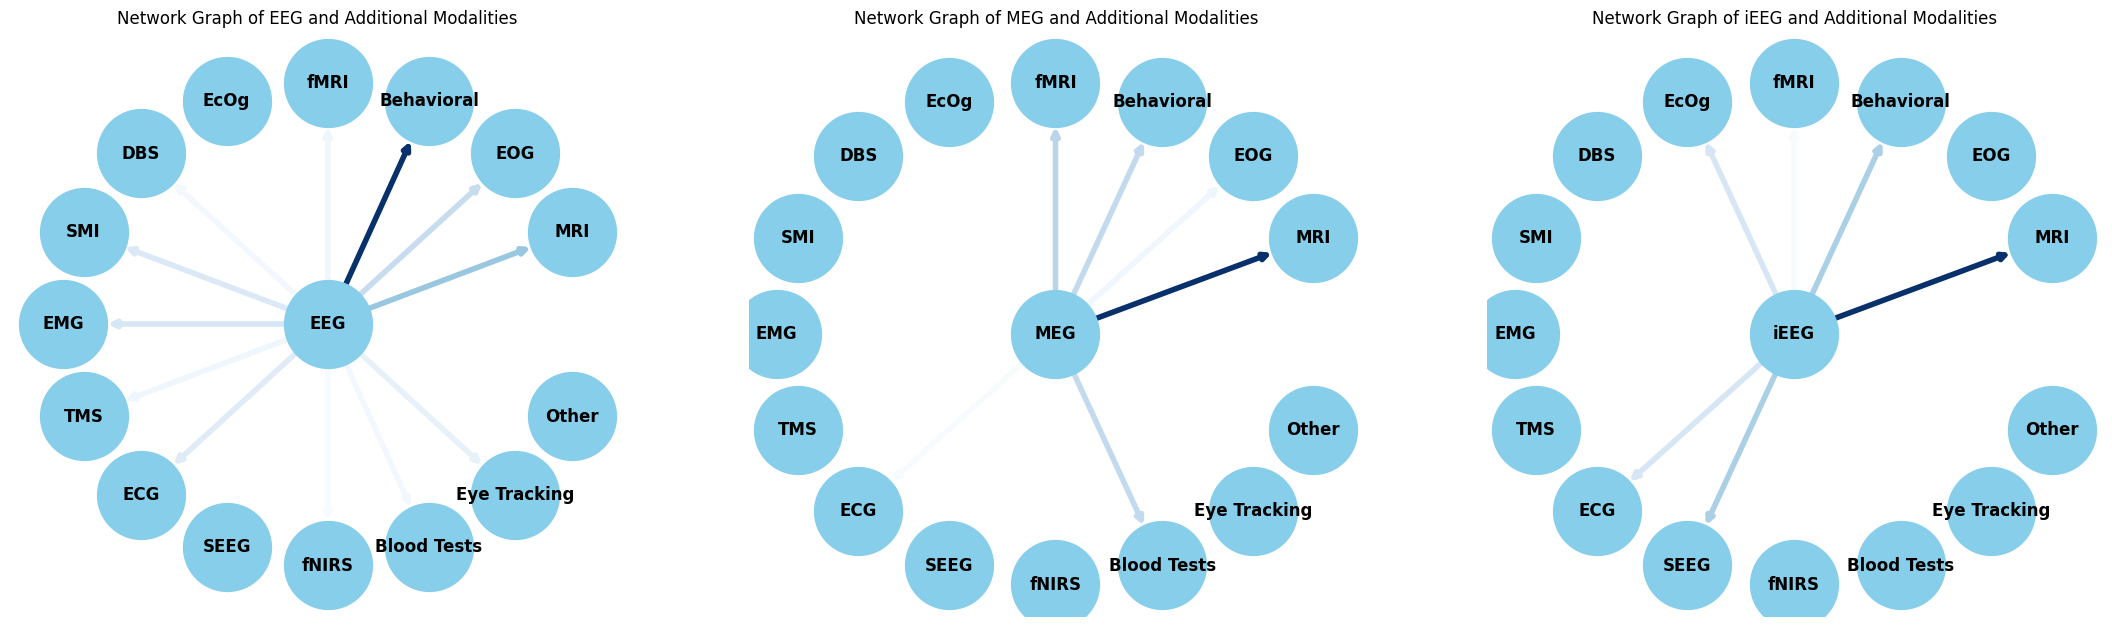

In [64]:
import networkx as nx

df_fig2 = df[['EEG Modality', 
              'MEG Modality', 
              'iEEG Modality',
              'Has MRI',
              'Has EOG',
              'Has Behavioral',
              'Has fMRi',
              'Has EcOg',
              'Has DBS',
              'Has SMI',
              'Has EMG',
              'Has TMS',
              'Has ECG',
              'Has SEEG',
              'Has fNIRS',
              'Has Blood Tests',
              'Eye tracking',
              'Other (put in name)']]

df_fig2.rename(columns={
    'EEG Modality': 'EEG',
    'MEG Modality': 'MEG',
    'iEEG Modality': 'iEEG',
    'Has MRI': 'MRI',
    'Has EOG': 'EOG',
    'Has Behavioral': 'Behavioral',
    'Has fMRi': 'fMRI',
    'Has EcOg': 'EcOg',
    'Has DBS': 'DBS',
    'Has SMI': 'SMI',
    'Has EMG': 'EMG',
    'Has TMS': 'TMS',
    'Has ECG': 'ECG',
    'Has SEEG': 'SEEG',
    'Has fNIRS': 'fNIRS',
    'Has Blood Tests': 'Blood Tests',
    'Eye tracking': 'Eye Tracking',
    'Other (put in name)': 'Other'
}, inplace=True)

df_fig2_primaryModalities = ['EEG', 'MEG', 'iEEG']
df_fig2_additionalModalities = ['MRI', 
                                'EOG', 
                                'Behavioral', 
                                'fMRI', 
                                'EcOg', 
                                'DBS', 
                                'SMI', 
                                'EMG', 
                                'TMS', 
                                'ECG', 
                                'SEEG', 
                                'fNIRS', 
                                'Blood Tests', 
                                'Eye Tracking', 
                                'Other']

# Create a directed graph for EEG
G_EEG = nx.DiGraph()

# Add the start node for EEG
start_node_EEG = 'EEG'
G_EEG.add_node(start_node_EEG)

# Add the end nodes and edges with weights for EEG
for modality in df_fig2_additionalModalities:
    G_EEG.add_node(modality)
    weight = df_fig2[(df_fig2[start_node_EEG] == 'x') & (df_fig2[modality] == 'x')].shape[0]
    if weight > 0:
        G_EEG.add_edge(start_node_EEG, modality, weight=weight)

# Create a directed graph for MEG
G_MEG = nx.DiGraph()

# Add the start node for MEG
start_node_MEG = 'MEG'
G_MEG.add_node(start_node_MEG)

# Add the end nodes and edges with weights for MEG
for modality in df_fig2_additionalModalities:
    G_MEG.add_node(modality)
    weight = df_fig2[(df_fig2[start_node_MEG] == 'x') & (df_fig2[modality] == 'x')].shape[0]
    if weight > 0:
        G_MEG.add_edge(start_node_MEG, modality, weight=weight)

# Create a directed graph for iEEG
G_iEEG = nx.DiGraph()

# Add the start node for iEEG
start_node_iEEG = 'iEEG'
G_iEEG.add_node(start_node_iEEG)

# Add the end nodes and edges with weights for iEEG
for modality in df_fig2_additionalModalities:
    G_iEEG.add_node(modality)
    weight = df_fig2[(df_fig2[start_node_iEEG] == 'x') & (df_fig2[modality] == 'x')].shape[0]
    if weight > 0:
        G_iEEG.add_edge(start_node_iEEG, modality, weight=weight)

# Draw the graphs side by side
fig, axes = plt.subplots(1, 3, figsize=(27, 8))

# Function to create circular layout with start node in the center
def circular_layout_with_center(G, start_node):
    pos = nx.circular_layout(G)
    pos[start_node] = [0, 0]  # Place the start node in the center
    return pos

# Draw the EEG graph
pos_EEG = circular_layout_with_center(G_EEG, start_node_EEG)
edges_EEG = G_EEG.edges(data=True)
weights_EEG = [edge[2]['weight'] for edge in edges_EEG]

nx.draw(G_EEG, pos_EEG, with_labels=True, node_size=4000, node_color='skyblue', font_size=12, font_weight='bold', edge_color=(weights_EEG), edge_cmap=plt.cm.Blues, width=4, ax=axes[0])
axes[0].set_title('Network Graph of EEG and Additional Modalities')

# Draw the MEG graph
pos_MEG = circular_layout_with_center(G_MEG, start_node_MEG)
edges_MEG = G_MEG.edges(data=True)
weights_MEG = [edge[2]['weight'] for edge in edges_MEG]

nx.draw(G_MEG, pos_MEG, with_labels=True, node_size=4000, node_color='skyblue', font_size=12, font_weight='bold', edge_color=weights_MEG, edge_cmap=plt.cm.Blues, width=4, ax=axes[1])
axes[1].set_title('Network Graph of MEG and Additional Modalities')

# Draw the iEEG graph
pos_iEEG = circular_layout_with_center(G_iEEG, start_node_iEEG)
edges_iEEG = G_iEEG.edges(data=True)
weights_iEEG = [edge[2]['weight'] for edge in edges_iEEG]

nx.draw(G_iEEG, pos_iEEG, with_labels=True, node_size=4000, node_color='skyblue', font_size=12, font_weight='bold', edge_color=weights_iEEG, edge_cmap=plt.cm.Blues, width=4, ax=axes[2])
axes[2].set_title('Network Graph of iEEG and Additional Modalities')

plt.gcf().subplots_adjust(bottom=0.15) 

plt.show()


### Figure 3

Figure 3 - Author country x # of datasets x authors from multiple institutions

A world map showing the distribution of author countries. Use circles of varying sizes to represent the number of studies from each country, use heat map to show how many of those studies from each country were collaboration with another institution 


In [237]:
'''
US has so many studies that it's hard to see the other countries on the map.
Removing US to see the other countries alone. 
Creating plot with international countries excluding US. 
'''

# create dataframe for number of studies from each country
countries = df['Author country']
countries = countries.astype(str)
countries = countries.str.strip().str.lower().str.replace('.', '')
replacements = {
    "usa": "united states",
    "uk": "united kingdom",
    "romani": "romania",
    'the netherlands': 'netherlands'
}
countries.replace(replacements, inplace=True)

# calculate df without US
countries_noUS = countries[countries != 'united states']
unique_countries_noUS, counts_noUS = np.unique(countries_noUS, return_counts=True)
country_counts_df = pd.DataFrame({
    'Country': unique_countries_noUS,
    'Count': counts_noUS
})

# Create a plotly scatter_geo plot
fig3_noUS = px.scatter_geo(country_counts_df, locations="Country", locationmode='country names',
                     size="Count", projection="natural earth",
                     title="World Map with Circles Representing Number of Studies",
                     color_continuous_scale="Viridis")
fig3_noUS.show()

'''
Now, create a plot with only the US to see the distribution of studies within the US.
'''

usa = df[['Author country', 'First author state']]
usa = usa.map(lambda x: x.strip().lower().replace('.', ''))
usa.replace({"usa": "united states"}, inplace=True)
usa = usa[usa['Author country'] == 'united states']

city_replacements = {
    'chicago': 'illinois',
    'pittsburgh': 'pennsylvania',
}
usa.replace(city_replacements, inplace=True)

states_unique, states_counts = np.unique(usa['First author state'], return_counts=True)
states_counts = states_counts.astype(int)

usa_counts_df = pd.DataFrame({
    'Country': states_unique,
    'Count': states_counts
})
# Dictionary to convert state names to abbreviations
state_abbrev = {
    'alabama': 'AL', 'alaska': 'AK', 'arizona': 'AZ', 'arkansas': 'AR', 'california': 'CA',
    'colorado': 'CO', 'connecticut': 'CT', 'delaware': 'DE', 'florida': 'FL', 'georgia': 'GA',
    'hawaii': 'HI', 'idaho': 'ID', 'illinois': 'IL', 'indiana': 'IN', 'iowa': 'IA',
    'kansas': 'KS', 'kentucky': 'KY', 'louisiana': 'LA', 'maine': 'ME', 'maryland': 'MD',
    'massachusetts': 'MA', 'michigan': 'MI', 'minnesota': 'MN', 'mississippi': 'MS', 'missouri': 'MO',
    'montana': 'MT', 'nebraska': 'NE', 'nevada': 'NV', 'new hampshire': 'NH', 'new jersey': 'NJ',
    'new mexico': 'NM', 'new york': 'NY', 'north carolina': 'NC', 'north dakota': 'ND', 'ohio': 'OH',
    'oklahoma': 'OK', 'oregon': 'OR', 'pennsylvania': 'PA', 'rhode island': 'RI', 'south carolina': 'SC',
    'south dakota': 'SD', 'tennessee': 'TN', 'texas': 'TX', 'utah': 'UT', 'vermont': 'VT',
    'virginia': 'VA', 'washington': 'WA', 'west virginia': 'WV', 'wisconsin': 'WI', 'wyoming': 'WY'
}
# Convert state names to abbreviations
usa_counts_df['Country'] = usa_counts_df['Country'].map(state_abbrev).fillna(usa_counts_df['Country'])


fig3_us = px.scatter_geo(usa_counts_df, locations="Country", locationmode='USA-states',
                     size="Count", projection="albers usa",
                     title="US Map with Circles Representing Number of Studies",
                     color_continuous_scale="Viridis")
fig3_us.show()

### Figure 4

Figure 4 - Published date x number of datasets x modality

A line graph showing the number of publications over time, segmented by modality

denote that all of the data is combination - like mri is eeg-mri

denote this is over evolution of nemar/openneuro, thats how old database is

take top 3 eeg/meg/ieeg on one plot, and then the other modalities on another plot

In [ ]:
df_fig4 = df[['EEG Modality', 
              'MEG Modality', 
              'iEEG Modality',
              'Has MRI',
              'Has EOG',
              'Has Behavioral',
              'Has fMRi',
              'Has EcOg',
              'Has DBS',
              'Has SMI',
              'Has EMG',
              'Has TMS',
              'Has ECG',
              'Has SEEG',
              'Has fNIRS',
              'Has Blood Tests',
              'Eye tracking',
              'Other (put in name)',
              'Published date']]

df_fig4.rename(columns={
    'EEG Modality': 'EEG',
    'MEG Modality': 'MEG',
    'iEEG Modality': 'iEEG',
    'Has MRI': 'MRI',
    'Has EOG': 'EOG',
    'Has Behavioral': 'Behavioral',
    'Has fMRi': 'fMRI',
    'Has EcOg': 'EcOg',
    'Has DBS': 'DBS',
    'Has SMI': 'SMI',
    'Has EMG': 'EMG',
    'Has TMS': 'TMS',
    'Has ECG': 'ECG',
    'Has SEEG': 'SEEG',
    'Has fNIRS': 'fNIRS',
    'Has Blood Tests': 'Blood Tests',
    'Eye tracking': 'Eye Tracking',
    'Other (put in name)': 'Other'
}, inplace=True)

df_fig4_primaryModalities = df_fig4[['EEG', 'MEG', 'iEEG', 'Published date']]
df_fig4_secondaryModalities = df_fig4[['MRI', 
                                       'EOG', 
                                       'Behavioral', 
                                       'fMRI', 
                                       'EcOg', 
                                       'DBS', 
                                       'SMI', 
                                       'EMG', 
                                       'TMS', 
                                       'ECG', 
                                       'SEEG', 
                                       'fNIRS', 
                                       'Blood Tests', 
                                       'Eye Tracking', 
                                       'Other', 
                                       'Published date']]


# primary modality graph generation

# Initialize the dictionary with empty dataframes
dfs_by_modalities = {col: pd.DataFrame(columns=df_fig4.columns) for col in df_fig4_primaryModalities.columns if col != 'Published date'}
# Populate the dataframes
for index, row in df_fig4_primaryModalities.iterrows():
    for col in dfs_by_modalities.keys():
        if pd.notna(row[col]):
            dfs_by_modalities[col].loc[len(dfs_by_modalities[col])] = row
# Convert 'Published date' to datetime for sorting
for modality, modality_df in dfs_by_modalities.items():
    modality_df['Published date'] = pd.to_datetime(modality_df['Published date'])
    dfs_by_modalities[modality] = modality_df.sort_values(by='Published date')
    # Create a cumulative count of publications over time for each modality
    dfs_by_modalities[modality]['Cumulative Publications'] = range(1, len(modality_df) + 1)
# Create a plotly line graph for all modalities
df_fig4_primaryModalities = go.Figure()
for modality, modality_df in dfs_by_modalities.items():
    df_fig4_primaryModalities.add_trace(go.Scatter(
        x=modality_df['Published date'],
        y=modality_df['Cumulative Publications'],
        mode='lines',
        name=modality
    ))
df_fig4_primaryModalities.update_layout(
    title='Cumulative Publications Over Time for All Modalities',
    xaxis_title='Published Date',
    yaxis_title='Cumulative Number of Publications'
)

# secondary modality graph generation

# Initialize the dictionary with empty dataframes
dfs_by_modalities = {col: pd.DataFrame(columns=df_fig4.columns) for col in df_fig4_secondaryModalities.columns if col != 'Published date'}
# Populate the dataframes
for index, row in df_fig4_secondaryModalities.iterrows():
    for col in dfs_by_modalities.keys():
        if pd.notna(row[col]):
            dfs_by_modalities[col].loc[len(dfs_by_modalities[col])] = row
# Convert 'Published date' to datetime for sorting
for modality, modality_df in dfs_by_modalities.items():
    modality_df['Published date'] = pd.to_datetime(modality_df['Published date'])
    dfs_by_modalities[modality] = modality_df.sort_values(by='Published date')
    # Create a cumulative count of publications over time for each modality
    dfs_by_modalities[modality]['Cumulative Publications'] = range(1, len(modality_df) + 1)
# Create a plotly line graph for all modalities
df_fig4_secondaryModalities = go.Figure()
for modality, modality_df in dfs_by_modalities.items():
    df_fig4_secondaryModalities.add_trace(go.Scatter(
        x=modality_df['Published date'],
        y=modality_df['Cumulative Publications'],
        mode='lines',
        name=modality
    ))
df_fig4_secondaryModalities.update_layout(
    title='Cumulative Publications Over Time for All Modalities',
    xaxis_title='Published Date',
    yaxis_title='Cumulative Number of Publications'
)


df_fig4_primaryModalities.show()
df_fig4_secondaryModalities.show()

/var/folders/ds/qxmx4zy969v_twj4bz2m_zvw0000gn/T/ipykernel_9738/3315669864.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Figure 5

Figure 5 - EEG channel histogram (see which are most common)

/var/folders/ds/qxmx4zy969v_twj4bz2m_zvw0000gn/T/ipykernel_9738/330398589.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/ds/qxmx4zy969v_twj4bz2m_zvw0000gn/T/ipykernel_9738/330398589.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



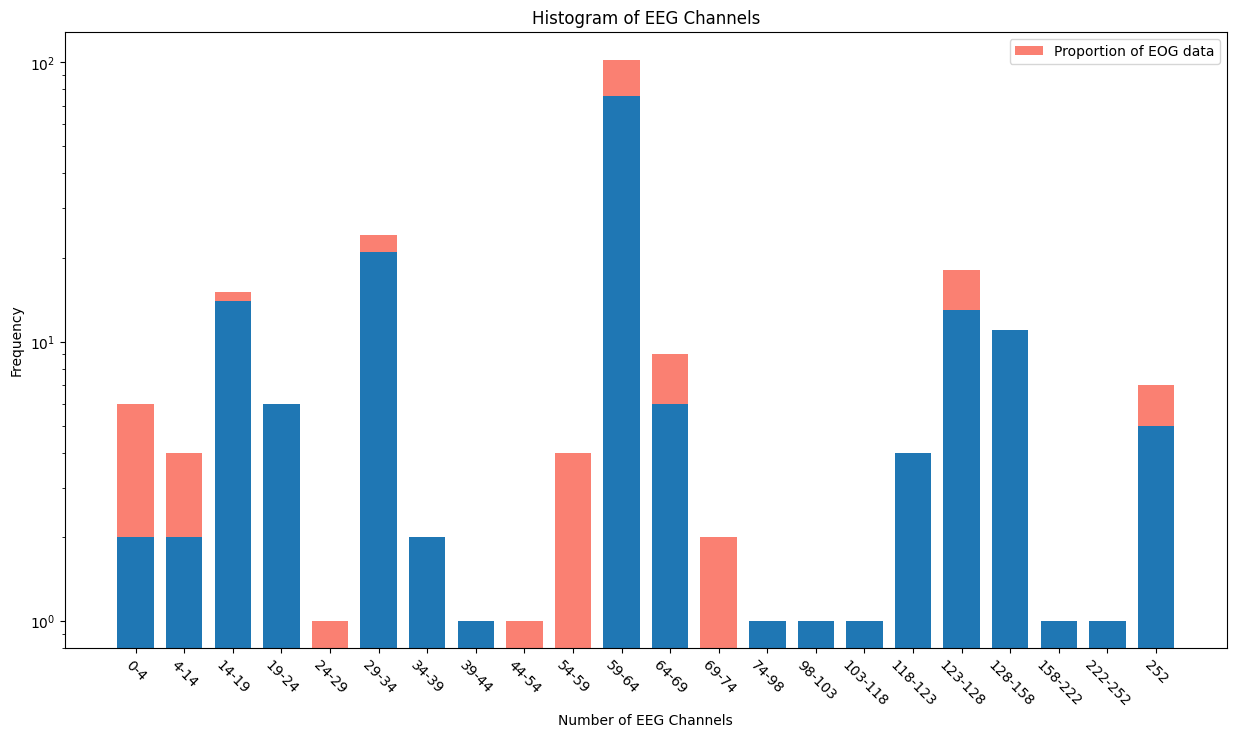

In [236]:
df_eeg_channels = df['EEG channels']
df_eeg_channels.replace("n/a", "", inplace=True)
df_eeg_channels.dropna()

# Convert the EEG channels to numeric, forcing errors to NaN
df_eeg_channels = pd.to_numeric(df_eeg_channels, errors='coerce')

# Drop NaN values
df_eeg_channels.dropna(inplace=True)

df_eog_channels = df[['EEG channels', 
                          'EOG channels']]
df_eog_channels.dropna(inplace=True)
df_eog_channels.drop(columns=['EOG channels'], inplace=True)
df_eog_channels = df_eog_channels.apply(pd.to_numeric, errors='coerce')
df_eog_channels.dropna(inplace=True)

df_eog_channels.head(40)

BIN_COUNT = 52
BAR_WIDTH = 0.75

fig, ax = plt.subplots(figsize=(15, 8))

# use numpy histogram so we can perform filtering
hist, bin_edges = np.histogram(df_eeg_channels, bins=BIN_COUNT)

# so we can remove bins with zero entries
non_zero = np.nonzero(hist)
# take only entries where bin is non-zero
hist = hist[non_zero]
bin_edges = bin_edges[non_zero]
# generate labels based on bin edge values (maybe use centers?)
x_ticks = [str(int(edge)) for edge in bin_edges]
for i in range(0, len(x_ticks)-1):
    x_ticks[i] = f"{x_ticks[i]}-{x_ticks[i+1]}"
x_ticks[-1] = f'252'
indices = np.arange(len(bin_edges))

hist_eog = np.zeros_like(hist)
for value in df_eog_channels['EEG channels']:
    bin_index = np.digitize(value, bin_edges) - 1
    hist_eog[bin_index] += 1
    hist[bin_index] -= 1

plt.bar(indices, hist, BAR_WIDTH, align='center')
plt.bar(indices, hist_eog, BAR_WIDTH, label='Proportion of EOG data', color='salmon', bottom=hist, align='center')
plt.xlabel('Number of EEG Channels')
plt.ylabel('Frequency')
plt.title('Histogram of EEG Channels')
plt.xticks(indices, x_ticks, rotation=-45)
ax.set_yscale('log')
ax.set_ylim(bottom=0.8)  # Set the bottom of the y-axis slightly above 10^0
plt.legend()
plt.show()


### Figure 7

histogram of age ranges

In [111]:
df_fig7 = df['Age range']
df_fig7.dropna(inplace=True)
df_fig7.str.replace(r'\s+', '', regex=True)
df_fig7_split = df_fig7.str.split('-', expand=True)
df_fig7_split = df_fig7_split.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df_fig7_split.dropna(inplace=True)
df_fig7_split = df_fig7_split.apply(pd.to_numeric, errors='coerce')

# Define the bins
bins = np.arange(0, 105, 5)
bin_counts = np.zeros(len(bins) - 1)

# Iterate through each row in df_fig7_split
for _, row in df_fig7_split.iterrows():
    start_age, end_age = row[0], row[1]
    for i in range(len(bins) - 1):
        if bins[i] < start_age < bins[i + 1] or bins[i] < end_age < bins[i + 1] or (start_age <= bins[i] and end_age >= bins[i + 1]):
            bin_counts[i] += 1

# Create a DataFrame for the histogram
hist_data = pd.DataFrame({'Age Range': bins[:-1], 'Count': bin_counts})

# Create the histogram using plotly
fig = px.bar(hist_data, x='Age Range', y='Count', title='Histogram of Age Ranges')
fig.update_layout(
    xaxis_title='Age Range',
    yaxis_title='Count',
    xaxis=dict(tickmode='array', tickvals=bins, ticktext=[f'{int(b)}-{int(b+5)}' for b in bins[:-1]])
)
fig.show()

# pd.set_option('display.max_rows', None)
# print(df_fig7_split)

/var/folders/ds/qxmx4zy969v_twj4bz2m_zvw0000gn/T/ipykernel_9738/764560467.py:5: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



### Figure 8

participants x modality


In [245]:
df_fig8 = df[['Participants',
              'FOR FIGURE - modality of exp']]
df_fig8.dropna(inplace=True)

modalities_fig8 = df_fig8['FOR FIGURE - modality of exp'].unique()

# Initialize the dictionary with empty dataframes
dfs_by_modalities_fig8 = {modality: pd.DataFrame(columns=df_fig8.columns) for modality in modalities_fig8}

# Populate the dataframes
for index, row in df_fig8.iterrows():
    for modality in modalities_fig8:
        if modality in str(row['FOR FIGURE - modality of exp']).lower():
            dfs_by_modalities_fig8[modality].loc[len(dfs_by_modalities_fig8[modality])] = row

# Combine all dataframes in dfs_by_modalities_fig8 into a single dataframe
combined_df = pd.concat(dfs_by_modalities_fig8.values(), keys=dfs_by_modalities_fig8.keys()).reset_index(level=0).rename(columns={'level_0': 'Modality'})

# Convert Participants to numeric for sorting
combined_df['Participants'] = pd.to_numeric(combined_df['Participants'], errors='coerce')

# Create the strip plot with sorted x-axis
fig_strip = px.strip(combined_df.sort_values(by='Participants'), x='Participants', y='Modality', title='Participants by Modality', stripmode='overlay')

# Create a log version of fig_strip
fig_strip_log = px.strip(combined_df.sort_values(by='Participants'), x='Participants', y='Modality', title='Participants by Modality (log)', stripmode='overlay')
fig_strip_log.update_xaxes(type="log")

# Filter out the outlier
filtered_combined_df = combined_df[combined_df['Participants'] != 2951]

# Create the second strip plot without the outlier
fig_strip_no_outlier = px.strip(filtered_combined_df.sort_values(by='Participants'), 
                                x='Participants', y='Modality', 
                                title='Participants by Modality (Without Outlier)', 
                                stripmode='overlay')

# Create a log version of the second fig_strip without the outlier
fig_strip_no_outlier_log = px.strip(filtered_combined_df.sort_values(by='Participants'), x='Participants', y='Modality', title='Participants by Modality (Without Outlier) (log)', stripmode='overlay')
fig_strip_no_outlier_log.update_xaxes(type="log")

fig_strip.show()
fig_strip_log.show()
fig_strip_no_outlier.show()
fig_strip_no_outlier_log.show()

/var/folders/ds/qxmx4zy969v_twj4bz2m_zvw0000gn/T/ipykernel_9738/1863621679.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

